In [1]:
import pandas as pd 
import scipy.stats as stat
import numpy as np

In [2]:
!pip install wquantiles

In [3]:
import wquantiles

In [4]:
# Reading dataframe
state = pd.read_csv("Data/state.csv")
state.head(5)


,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


## Central tendency

In [5]:
#Mean
print("Mean: " , state["Population"].mean())
print("Trimmed Mean:" , stat.trim_mean(state["Population"] , 0.1)) #trimming the 10% data
print("Median",state["Population"].median())

Mean:  6162876.3
Trimmed Mean: 4783697.125
Median 4436369.5


In [6]:
#Weighted mean 
weighted_mean = np.average(state["Murder.Rate"] , weights=state["Population"])
weighted_median = wquantiles.median(state["Murder.Rate"] , weights = state["Population"])
print(f"Weighted mean: {weighted_mean}")
print(f"Weighted median: {weighted_median}")

Weighted mean: 4.445833981123393
Weighted median: 4.4


In [7]:
#Quartiles
q3 = np.quantile(state["Population"] , 0.75)
q1 = np.quantile(state["Population"] , 0.25)
print("Upper Quartile:" , q3)
print("Lower Quartile:" , q1)

Upper Quartile: 6680312.25
Lower Quartile: 1833004.25


## Dispersion

In [8]:
pop_std = state["Population"].std()
pop_var = pop_std**2 #OR state["Population"].var()
print(f"The standard deviation of population: {pop_std}")
print(f"The variance of population: {pop_var}")
print(f"Interqurtile range: {q3 - q1}")

The standard deviation of population: 6848235.347401142
The variance of population: 46898327373394.445
Interqurtile range: 4847308.0


In [9]:
from statsmodels.robust.scale import mad as MAD
mean_absolute_deviation = MAD(state["Population"])
print(f"The mean absolute deviation: {mean_absolute_deviation}")

The mean absolute deviation: 3849876.1459979336


## Exploration of data distribution

In [10]:
state["Murder.Rate"].quantile([0.05 , 0.25 , 0.5 , 0.75 , 0.95])

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

Text(0, 0.5, 'Population (Millions)')

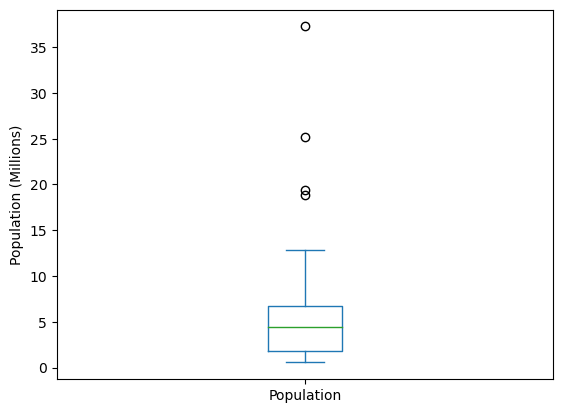

In [11]:
ax = (state["Population"]/1_000_000).plot.box() 
ax.set_ylabel("Population (Millions)")

In [12]:
def join_states(states):
    return ",".join(states)

In [13]:
#frequency table and histograms 
state["binnedPopulation"] = pd.cut(state["Population"] , 10)
state.groupby("binnedPopulation")["State" , "binnedPopulation" ].agg([join_states , "count"]).reset_index()

C:\Users\A C E R\AppData\Local\Temp\ipykernel_18140\4020180312.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  state.groupby("binnedPopulation")["State" , "binnedPopulation" ].agg([join_states , "count"]).reset_index()
C:\Users\A C E R\AppData\Local\Temp\ipykernel_18140\4020180312.py:3: FutureWarning: ['binnedPopulation'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  state.groupby("binnedPopulation")["State" , "binnedPopulation" ].agg([join_states , "count"]).reset_index()


binnedPopulation  \
                              
0    (526935.67, 4232659.0]   
1    (4232659.0, 7901692.0]   
2   (7901692.0, 11570725.0]   
3  (11570725.0, 15239758.0]   
4  (15239758.0, 18908791.0]   
5  (18908791.0, 22577824.0]   
6  (22577824.0, 26246857.0]   
7  (26246857.0, 29915890.0]   
8  (29915890.0, 33584923.0]   
9  (33584923.0, 37253956.0]   

                                               State        
                                         join_states count  
0  Alaska,Arkansas,Connecticut,Delaware,Hawaii,Id...    24  
1  Alabama,Arizona,Colorado,Indiana,Kentucky,Loui...    14  
2  Georgia,Michigan,New Jersey,North Carolina,Ohi...     6  
3                              Illinois,Pennsylvania     2  
4                                            Florida     1  
5                                           New York     1  
6                                              Texas     1  
7                                                        0  
8                                                        0  
9                                         California     1

Text(0.5, 0, 'Population (Millions)')

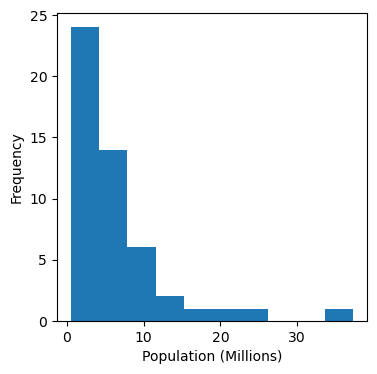

In [14]:
ax = (state["Population"] / 1_000_000).plot.hist(figsize = (4,4))
ax.set_xlabel("Population (Millions)")

Text(0.5, 0, 'Murder Rate (per 100,000)')

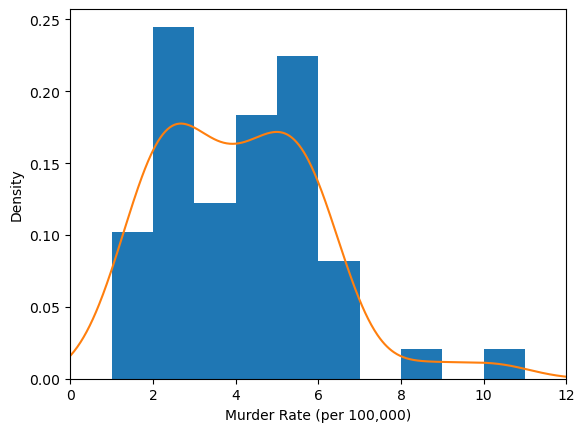

In [15]:
#Density plot 
ax = state["Murder.Rate"].plot.hist(density = True  , xlim = [0 , 12]  , bins = range(1 , 12))
state["Murder.Rate"].plot.density(ax = ax)
ax.set_xlabel("Murder Rate (per 100,000)")

## Binary and categorical data

In [16]:
dfw = pd.read_csv("data/dfw_airline.csv")
dfw

,Carrier,ATC,Weather,Security,Inbound
0,64263.16,84856.5,11235.42,343.15,118427.82


Text(0, 0.5, 'Count')

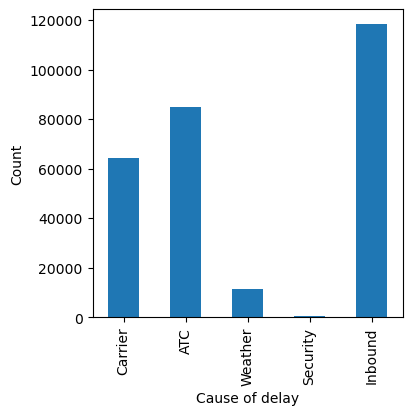

In [17]:
ax = dfw.transpose().plot.bar(figsize = (4,4) , legend = False)
ax.set_xlabel("Cause of delay")
ax.set_ylabel("Count")

In [18]:
sp500_px = pd.read_csv("data/sp500_sectors.csv")
sp500_px.head(5)

,sector,sector_label,sub_sector,symbol
0,information_technology,Technology,data_processing_&_outsourced_services,ADS
1,information_technology,Technology,systems_software,CA
2,information_technology,Technology,systems_software,MSFT
3,information_technology,Technology,systems_software,RHT
4,information_technology,Technology,it_consulting_&_services,CTSH


In [19]:
import seaborn as sns